In [ ]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

CLIENT_ID = "8a627bab34f5494f89671b918d96cfd5"
CLIENT_SECRET = "db4e67cc19b646379785750833696ce5"
username = "muqeetat"
scope = "user-top-read user-library-read playlist-read-private playlist-read-collaborative user-read-recently-played"
redirect_uri = 'http://mysite.com/callback/'

token = util.prompt_for_user_token(username=username,scope=scope,client_id=CLIENT_ID,client_secret=CLIENT_SECRET,redirect_uri=redirect_uri)
sp = spotipy.Spotify(auth=token)

In [ ]:
# Set parameters
limit = 50  # Max limit per request. Spotify API allows fetching a maximum of 50 songs per request
total_songs_to_fetch = 500  # Number of songs you want to fetch
all_songs = []

In [32]:
# Loop through and fetch songs in batches
for offset in range(0, total_songs_to_fetch, limit):
    # Fetch the current batch of songs
    # Offset - the index of the first item (starting from) to return e.g starting from index 50 out 200 songs. This parameter determines the starting position for each batch
    # results- This variable stores the entire response from the Spotify API when you call sp.current_user_saved_tracks.
    results = sp.current_user_saved_tracks(limit=limit, offset=offset)

    # Loop through each item in results['items']
    for item in results['items']:
        track = item['track']
        artist_id = track['artists'][0]['id']
        
        # Fetch artist details to get the genre
        artist = sp.artist(artist_id)
        genres = ', '.join(artist['genres'])  # Join all genres into a single string
        # Extract relevant information
        song_info = {
            'name': track['name'],  # Song name
            'artist': ', '.join([artist['name'] for artist in track['artists']]),  # List of artists
            'album': track['album']['name'],  # Album name
             'genres': genres, 
            'release_date': track['album']['release_date'],  # Release date of the album
            'duration_ms': track['duration_ms'],  # Duration of the song in milliseconds
            'popularity': track['popularity'],  # Popularity of the song
            'added_at': item['added_at']  # Date when the song was added to the library
        }
    
        # Append the dictionary to the all_songs list
        all_songs.append(song_info)


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
# Loading Data
# df = pd.DataFrame(all_songs)  # Convert the list of song names into a DataFrame

# Data Cleanup
df['added_at'] = pd.to_datetime(df['added_at'], utc=True)     # Converts the added_at column to datetime while recognizing that it is in UTC.
df['added_at'] = df['added_at'].dt.tz_localize(None)   # Remove the timezone information (convert to local time)
df['added_at'] = df['added_at'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Format to display only year, month, day, and time

df['added_at'] = pd.to_datetime(df['added_at'])
df['release_date'] = pd.to_datetime(df['release_date'])

df.rename(columns={'artist': 'artist_name','name': 'track_name'}, inplace=True)

# df.to_csv('spotify_data.csv', index=False)

In [5]:
# Create a dataframe from csv file
df = pd.read_csv('C:/Users/DELL/Documents/Python_Data_Project/Spotify_Project/spotify_data.csv')

# Data Cleanup


df['added_at'] = pd.to_datetime(df['added_at'], format='%Y-%m-%d %H:%M:%S')
df['release_date'] = pd.to_datetime(df['release_date'])
# df['added_year'] = df['added_at'].dt.year


# df['genres'] = df['genres'].apply(lambda x: x.split(', ') if pd.notna(x) else x)
df.rename(columns={'artist': 'artist_name','name': 'track_name'}, inplace=True)
# type(df['genres'][0])
# Print the dataframe
df

,track_name,artist_name,album,genres,release_date,duration_ms,popularity,added_at,added_year
0,Takes One To Know One,The Beaches,Takes One To Know One,"canadian indie rock, toronto indie",2024-07-12,167996,62,2024-08-06 14:18:25,2024
1,What If You Change?,The Wldlfe,Turtleneck,"hopebeat, indy indie",2024-06-12,205666,27,2024-06-15 08:10:21,2024
2,Intrusive Thoughts,Natalie Jane,Where Am I?,singer-songwriter pop,2023-11-17,201066,60,2024-06-14 13:29:27,2024
3,Shut Up About It,Sadie Jean,Simple Like 17 (Deluxe),"alt z, singer-songwriter pop",2024-05-17,198287,49,2024-06-14 13:00:51,2024
4,Unfinished Business (Acoustic),"NERIAH, JC Stewart",Unfinished Business (Acoustic),"alt z, singer-songwriter pop",2022-09-30,208000,47,2024-06-13 19:15:26,2024
...,...,...,...,...,...,...,...,...,...
337,Not Sad Anymore,Clara Mae,Not Sad Anymore,"alt z, swedish pop",2021-06-18,195563,50,2022-02-06 22:12:04,2022
338,Wishful Thinking,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,160561,54,2022-02-06 22:08:46,2022
339,The Bottom,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,180488,59,2022-02-06 22:04:35,2022
340,Rockland,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,217368,60,2022-02-06 22:02:20,2022


In [9]:
df[df.duplicated(subset=['track_name','artist_name','duration_ms'])]
df[df.duplicated(subset=['track_name','artist_name','album'])] 


,track_name,artist_name,album,genres,release_date,duration_ms,popularity,added_at,added_year


In [8]:
df= df.drop_duplicates(subset=['track_name','artist_name','album'])
# pd.set_option('display.max.rows',20)
# pd.isnull(df_merging).sum()

#### Determine how diverse your music taste is by looking at the number of different genres you listen to.

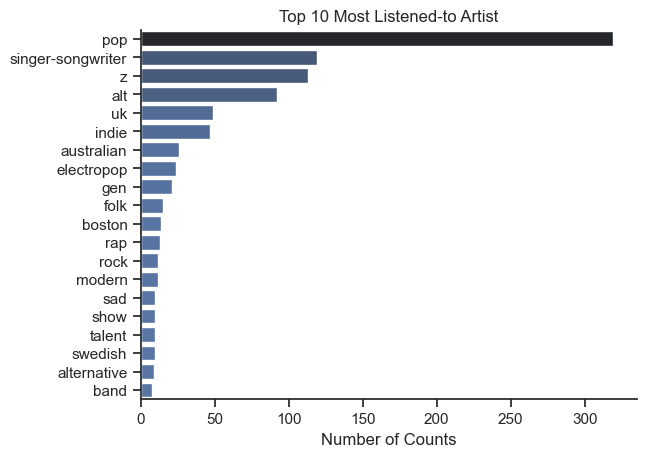

In [27]:
# DataFrame Copy
# df_copy = df.copy()

# df_copy['genres'] = df_copy['genres'].str.replace(',', '')

# Step 2: Split by space and explode into individual words
# all_genres = df_copy['genres'].str.split().explode().tolist()

df_plot=pd.DataFrame(all_genres,columns=['genre_keyword']).value_counts().to_frame().head(20)
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='genre_keyword', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 20 Genre Keywords')
plt.xlabel('Number of Counts')
plt.ylabel('')
plt.show()

### Popularity

In [23]:

df[['artist_name', 'track_name','popularity']].sort_values(by='popularity', ascending=False).head(10)

,artist_name,track_name,popularity
77,Sabrina Carpenter,Espresso,98
113,Artemas,i like the way you kiss me,91
170,Benson Boone,Beautiful Things,90
106,Benson Boone,Slow It Down,89
108,SZA,Saturn,89
188,Tate McRae,greedy,89
110,Ariana Grande,we can't be friends (wait for your love),89
187,Sabrina Carpenter,Feather,88
217,Billie Eilish,What Was I Made For? [From The Motion Picture ...,87
215,Olivia Rodrigo,vampire,85
